# Project 1: Exploring The Data in the Movie Database (TMDb)

Each year, there are thousands of movies release with only a small percentage being successful. The fouces of this project will be to analyze the factors that affect the commercial success of these release. 

# Table of Contents
1. [Introduction](#Intro)
1. [Data Wrangling](#Wrangle)
1. [Exploratory Analysis](#Explore)
1. [Conclusion](#Ending)

# Introduction <a id="Intro"></a>

The main goal of this exercise is to analyze the TMDb Movie Database. The dataset itself contains around 10,000 movies from the Movie Database or TMDb from 1965 to 2015. The dataset includes details such as the actor, directors, rating information, production cost, revenue, runtime, and title.

The  question I will attempt to answer are related to profitability and popularity.
1. Measuring profitability
   * Which year recorded the greatest profit?
   * Which month does movie industry make the highest profit?
   * Can ratings correlate to profits?
1. Which genres are most popular
    * Can we determine which genres are most popular?
    * Can we determine the genres that are the most profitable?
    * Can we determine the popularity of our five genres?


In [97]:
#Import all packages needed to complete an analysis

import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

%matplotlib inline

# Data Wrangling <a id="Wrangle"></a>

Data Wrangling is the starting point for the investigation into the tmdb-movies.csv data set.
* Load data
* Review the cleanliness of the data
* Trim and clean the dataset for analysis


### Reading and review of the data

I loaded the CSV into a pandas dataframe in order to perform a high level look of the information.
1. First view is the first five rows of the dataset
1. Second view is the last two rows of the dataset

In [4]:
#Load data 
df=pd.read_csv(r'C:\Users\Project1\tmdb-movies.csv')

#Print out the first five rows of the dataset
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [17]:
#Print last two rows of the dataset
df.tail(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


This initial review of the dataset shows that it provides various parameters for each movie.

Some of the columns in the dataset include:
* budget
* revenue
* runtime
* genres
* popularity
* vote average
* vote count
* release date
* release year

### Numbers of rows columns
In total, there are 10,866 rows, and 21 columns in the dataset. 

In [18]:
#View dimensions of dataset-Number of rows and columns
df.shape

(10866, 21)

### Column Data Types and Summary of Dataframe 
* Return the data types
    * Date columns are not in a date datatype. This will be converted
* Check for columns containing null values
    * Research these columns further
* Summary of Dataframe
    * A brief summary of the data frame that includes the number of non-null values in each column

In [21]:
#Check rows, columns, data types, missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Locating missing values in the dateset

In [27]:
#Checking for null values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### List columns containing null values

In [22]:
#Columns with null values
df.columns[df.isnull().any()].tolist()

['imdb_id',
 'cast',
 'homepage',
 'director',
 'tagline',
 'keywords',
 'overview',
 'genres',
 'production_companies']

### Number of columns containing null values

In [23]:
#Count of null values
df.isnull().any(axis=1).sum()

8874

There are a large number of null values in the dataset. I will break this down further in the next section and try to identify the areas with missing data.

In [29]:
#Count the total number of rows in each column that contain a null value
df.isin([0]).sum()

id                         0
imdb_id                    0
popularity                 0
budget                  5696
revenue                 6016
original_title             0
cast                       0
homepage                   0
director                   0
tagline                    0
keywords                   0
overview                   0
runtime                   31
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj              5696
revenue_adj             6016
dtype: int64

The budget and revenue columns comprise the majority of the row with missing data. These will be dropped during the data cleaning process. 

### Duplicate rows in dataset

In [25]:
#Find dups
sum(df.duplicated())

1

### Indentifing the duplicate row

In [26]:
#Find dups2
for i, v in df.duplicated().iteritems():
    if(v):
        print (df.loc[i])

id                                                                  42194
imdb_id                                                         tt0411951
popularity                                                        0.59643
budget                                                           30000000
revenue                                                            967000
original_title                                                     TEKKEN
cast                    Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...
homepage                                                              NaN
director                                                 Dwight H. Little
tagline                                               Survival is no game
keywords                martial arts|dystopia|based on video game|mart...
overview                In the year of 2039, after World Wars destroy ...
runtime                                                                92
genres                        Crime|Dr

Listed below is the duplicate information. This will be dropped during the data cleaning process.

In [32]:
#Diplay dups
df[df.duplicated(keep=False)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


## Data Cleaning

In the next section I will:
* Remove any duplicate rows from the dataset
* Remove columns that are not part of the analysis
* Remove movies that do not have:
    * budget
    * revenue
    * runtime
* Change the format of:
    * release date to a datetime format
    * budget_adj from a float to an int
    * revenue_adj from a float to an int

### Removal of Duplicates

As mentioned in the Data Wrangling section, we will drop the duplicate values from the dataset at this time.

In [62]:
#Drop Duplicates
df.drop_duplicates(inplace=True)

In [63]:
#Confirm duplicates have been dropped
sum(df.duplicated())

0

### Removal of unused columns
I selected these rows for removal after reviewing the dataset.

In [64]:
#Dropping of unused columns
df.drop(['imdb_id','homepage','tagline','keywords','budget','revenue','overview'], axis=1, inplace=True)

In [65]:
#Confirm columns dropped
df.head(1)

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,Profit
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,1.254446e+09


### Removal of rows with a zero value
Another set in the data cleaning process is to remove row with a zero value. 

In [66]:
#Dropping zero value rows from dataset
df=df[(df !=0).all(1)]

In [183]:
#Confirm zero values have been removed
df.isin([0]).sum().any()

False

### Removal of null values
Null rows do not bring value to our future analysis.

In [67]:
#Dropping rows with null value
df.dropna(inplace=True)

In [68]:
#Confirm that null values have been dropped
df.isnull().sum().any()

False

### Updating data formatting
In order to leverage te Release Date field we need to converted it from an object data type to a datetime date type. 

In [91]:
#Converting release_date from str to datetime
df['release_date']=pd.to_datetime(df['release_date'], utc=True)

#Confirm change
df['release_date'].head()

0   2015-06-09 00:00:00+00:00
1   2015-05-13 00:00:00+00:00
2   2015-03-18 00:00:00+00:00
3   2015-12-15 00:00:00+00:00
4   2015-04-01 00:00:00+00:00
Name: release_date, dtype: datetime64[ns, UTC]

In [89]:
#df['month'] = pd.DatetimeIndex(df['release_date']).month
#df['year'] = pd.DatetimeIndex(df['release_date']).year
#df.head()

We can confirm that the column format has been changed to year-month-day.

In [92]:
#Running script from earlier to see the datet types for the remaining columns. Release_date was a Dtype of object.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3802 entries, 0 to 10848
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   id                    3802 non-null   int64              
 1   popularity            3802 non-null   float64            
 2   original_title        3802 non-null   object             
 3   cast                  3802 non-null   object             
 4   director              3802 non-null   object             
 5   runtime               3802 non-null   int64              
 6   genres                3802 non-null   object             
 7   production_companies  3802 non-null   object             
 8   release_date          3802 non-null   datetime64[ns, UTC]
 9   vote_count            3802 non-null   int64              
 10  vote_average          3802 non-null   float64            
 11  release_year          3802 non-null   int64              
 12  budge

In [70]:
#Rows and columns remaining after cleaning
df.shape

(3802, 16)

# Exploratory Analysis <a id="Explore"></a>

## Measuring profitability

### Calculating profit

Let's start off by creating a calculation for profit. We will need this going forward. 

In [18]:
#Profit calaculation
df['profit']=df['revenue_adj']-df['budget_adj']

#Verify the profit calculation worked
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08


We can see the calculation at the end of the data sheet. 

###  Question 1. Which year recorded the greatest profit?

Now. we will use the cleaned data to determine the year with the highest reported profit. 

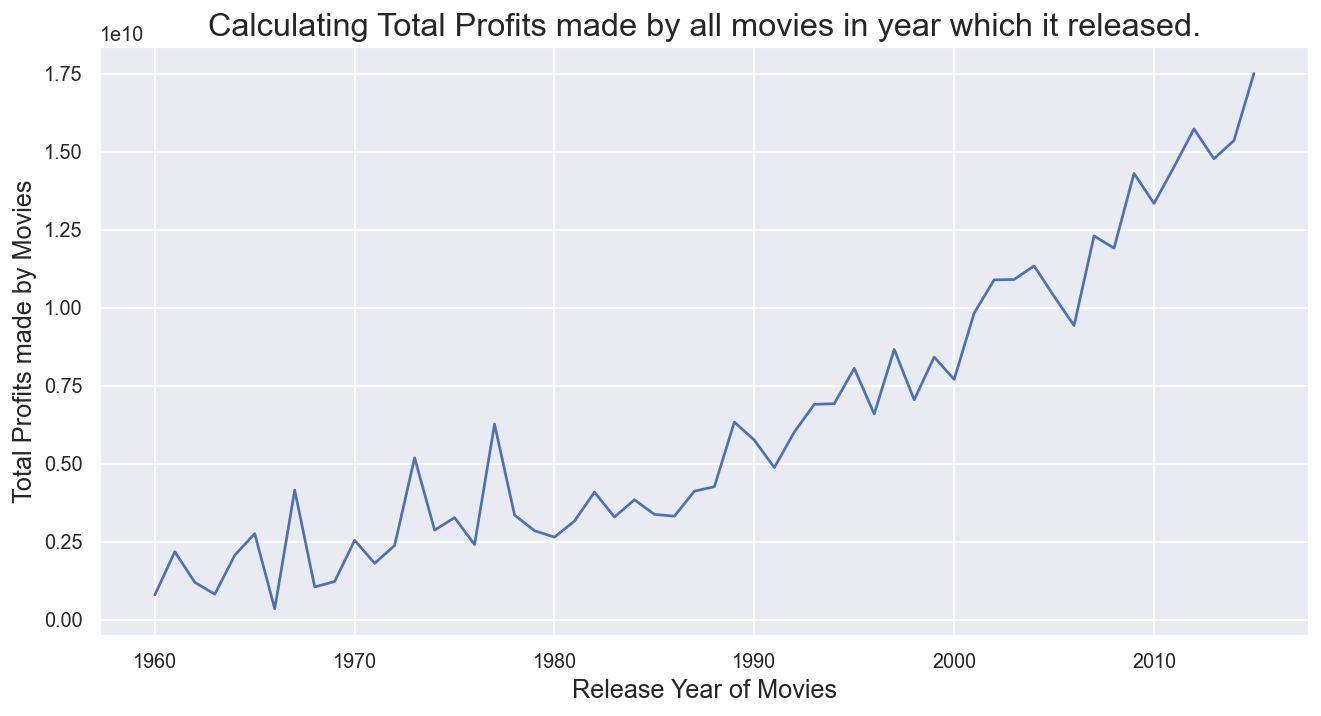

The movie industry highest profit year was in  2015 .


In [192]:
sns.set_style('darkgrid') 

profits_each_year = df.groupby('release_year')['profit'].sum()

#Giving the figure size(width, height)
plt.figure(figsize=(12,6), dpi=130)

#x-axis lable
plt.xlabel('Release Year of Movies',size = 14)
#y-axis lable
plt.ylabel('Total Profits made by Movies',size = 14)
#Title of a the plot
plt.title('Calculating Total Profits made by all movies in year which it released.',size=18)

#Plotting what needs to be plotted
plt.plot(profits_each_year)

#Showing the plot
plt.show()

max_profit= profits_each_year.idxmax()

print('The movie industry highest profit year was in ', max_profit,'.')

The highest record profits in the dataset was 2015. Over the period covered in this set, profits have risen steadily. There are down turns recorded in the dataset. Some of those can be attributed to a big blockbuster movie in the previous year, and other to a downturn in the economy. For instance, profits dropped in the area of 2008. This is the year the housing bubble popped and the US economy fell into the Great Recession. 


### Question 2. Which month does movie industry make the highest profit?

Our next drive into the data will attempt to determine which months are most profitable. This would help a movie studio set the release date for a big budget movie in order to maximize returns.

Text(0, 0.5, 'Profit')

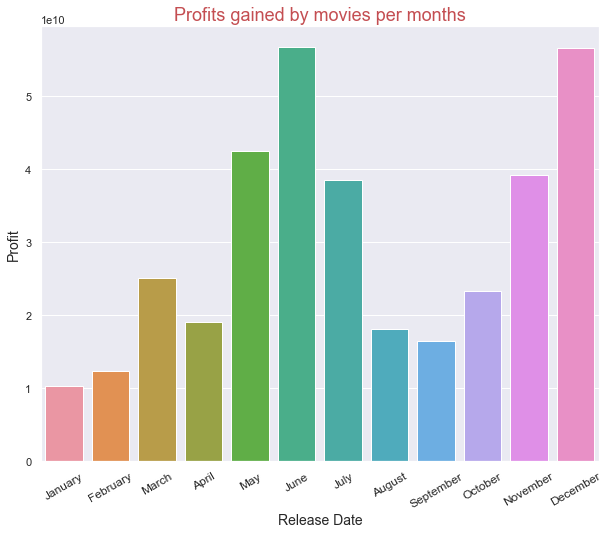

In [188]:
releasedate_index = df.set_index('release_date') 

#Extract month from the release data index
groupby_index = releasedate_index.groupby([(releasedate_index.index.month)])

#Monthly data 
profit_permonth = groupby_index['profit'].sum()
profit_permonth = pd.DataFrame(profit_permonth)

#Plot our data
sns.set(rc={'figure.figsize':(10,8)},style='darkgrid')

profit_permonth_bar = sns.barplot(x = profit_permonth.index, y = profit_permonth['profit'],data = profit_permonth)

profit_permonth_bar.axes.set_title('Profits gained by movies per months',color="r",fontsize = 18)

month_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

#Rotating the x-axis text 
profit_permonth_bar.set_xticklabels(month_list, rotation = 30, size = 12);

#x-axis lable
plt.xlabel('Release Date',size=14)
#y-axis lable
plt.ylabel('Profit',size=14)

This graphic shows the months of June and December are the two best months for profits. June being when most students and their families are out of class and take vacations. December being another time with people are off work and out of school for the holidays. 

In more board terms, you would want to plan the release of a big budget movie for the summer months or the holiday season.


### Question 3. Can ratings correlate to profits?

Next we will try to determine if a movies average rating affects the profit. 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


The correlation between ratings and profits is 0.29016751914252314 .


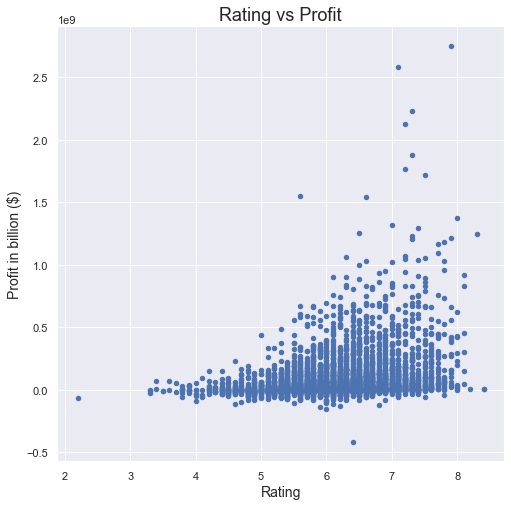

In [185]:
sns.set_style('darkgrid')

df2=df.loc[(df['budget_adj']>0) & (df['revenue_adj']>0)]

df2['Profit']=df['revenue_adj']-df['budget_adj']

df2.plot(x='vote_average',y='profit',kind='scatter',figsize=(8,8));
#y-axis lable
plt.ylabel('Profit in billion ($)',size=14);
#x-axis lable
plt.xlabel('Rating',size=14);
#Title of a the plot
plt.title('Rating vs Profit',size=18);


def correlation_coeff(x,y):
    std_x=(x-x.mean())/x.std(ddof=0)
    std_y=(y-y.mean())/y.std(ddof=0)
    return(std_x*std_y).mean()

correlation_coeff(df2['budget_adj'],df2['revenue_adj'])

print('The correlation between ratings and profits is', correlation_coeff(df2['vote_average'],df2['profit']),'.')

We can see in the chart as we move from left to right and as the average rating increases, that the profit grows along with the higher average rating. Also, all of the high profit outliers are on the right of the chart, past the 5 average rating. 

## Which genres are most popular

Before we start to review the movie genres, we will have to do a little work to the Genres column from the dataset. This will require us separating combine genres.

In [109]:
#Seperate the genres  from combined value into single genre value 
df_split = df.assign(genres = df['genres'].str.split('|')).explode('genres')

#Confirm the change was effective
df_split.head(2)

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,Profit,month,year
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09 00:00:00+00:00,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,1.254446e+09,6,2015
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09 00:00:00+00:00,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,1.254446e+09,6,2015


### Question 1. Can we determinewhich genres are most popular?

Now that we have the genres separated we can take our first pass at answering the question. We'll start by reviewing how many of each genre has been released from 1960 to 2015. 

Text(0, 0.5, 'Number of Releases')

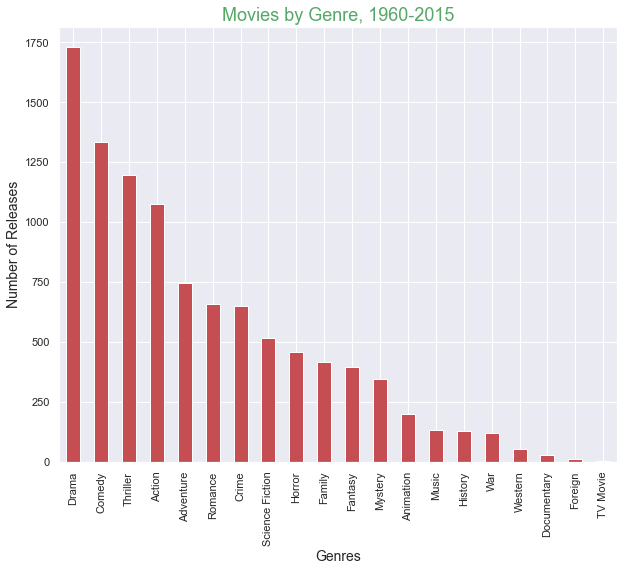

In [186]:
#Diplay the number of times each genre has been released
sns.set_style('darkgrid')

df_split['genres'].value_counts(ascending = False).plot(kind='bar',figsize = (10,8), color="r");

#Title of a the plot
plt.title('Movies by Genre, 1960-2015', size=18, color='g')
#x-axis lable
plt.xlabel('Genres', size=14)
#x-axis lable
plt.ylabel('Number of Releases', size=14)

Drama is the clear leader followed by comedy, and thrill. I was a bit surprised to see war movies so far down the chart.

Now let's see if we can tie our profit work to our popularity review.

### Question 2. Can we determine the genres that are the most profitable?

First a few calculations

In [133]:
#Calulating the profit of genres (we'll need this for the next visiulazation)
profit_and_genres_df = df_split[['original_title','profit','genres']]
mean_profit_vs_genre_df = profit_and_genres_df.groupby(['genres']).mean()
mean_profit_vs_genre_df = mean_profit_vs_genre_df.sort_values('profit', ascending=False)

#Confirm the logic works
mean_profit_vs_genre_df.head()

,profit
genres,
Animation,2.095299e+08
Adventure,1.917124e+08
Family,1.759687e+08
Fantasy,1.702145e+08
Science Fiction,1.370641e+08


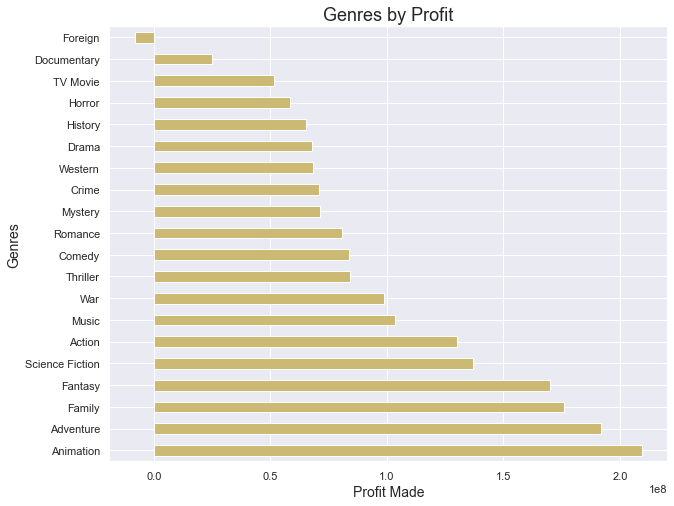

In [187]:
#Display genres by profit
sns.set_style('darkgrid')
mean_profit_vs_genre_df['profit'].plot(stacked=False, kind='barh', figsize = (10,8),color='y');
#Title of a the plot
plt.title('Genres by Profit',size=18)
#x-axis lable
plt.xlabel('Profit Made',size=14)
#y-axis lable
plt.ylabel('Genres',size=14);

Even though Drama has been the most popular genre, it has not returned the most profit. That honor goes to Animation. This is an interesting reversal in position since Animation was in the bottom 1/4 of the popularity graphic and Drama is in the bottom 1/4 of the profit graphic. 

We can look at this differently if we view the profitability of genres over the timeframe of the dataset. For this we will only look at the five more popular genres. This will make the graphic easier to understand. 

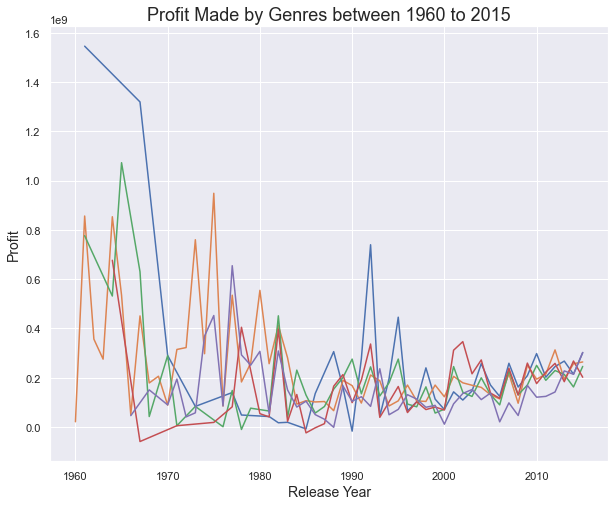

In [182]:
#Plotting the 5 most profitable genres over time
sns.set_style('darkgrid')

genres_peryear = df_split[['original_title','profit','genres','release_year','popularity']]

genre_profit = genres_peryear.groupby(['genres','release_year'], as_index=False)['profit'].mean()
fig,ax = plt.subplots(figsize=(10,8))

for genres in ['Animation','Adventure','Family','Fantasy','Science Fiction']:
    ax.plot(genre_profit[genre_profit.genres==genres].release_year,
            genre_profit[genre_profit.genres==genres].profit,label=genres)

#x-axis lable
ax.set_xlabel('Release Year',size=14)
#y-axis lable
ax.set_ylabel('Profit',size=14)
#Title of a the plot
plt.title('Profit Made by Genres between 1960 to 2015',size=18)
plt.show()

The graphic displays a lot of variation for the most profitable genre from year to year. This is to be expected since this movie industry releases many movies for each genre every year. You can see the effect of several blockbuster movies in the graphic. Star Wars was released in 1977 and we see that Science Fiction had the highest profit. Jurassic Park was released in 1993 and Science Fiction is clearly the highest profit earner. Lastly we have either 12 Monkeys or Independence Day in the mid 90s again giving Science Fiction a clear win in profits. 

### Question 3. Can we determine the popularity of our five genres?

Lastly, we will look at the popularity of the same five genres over the time provided in the dataset. Let see what trends we uncover.  

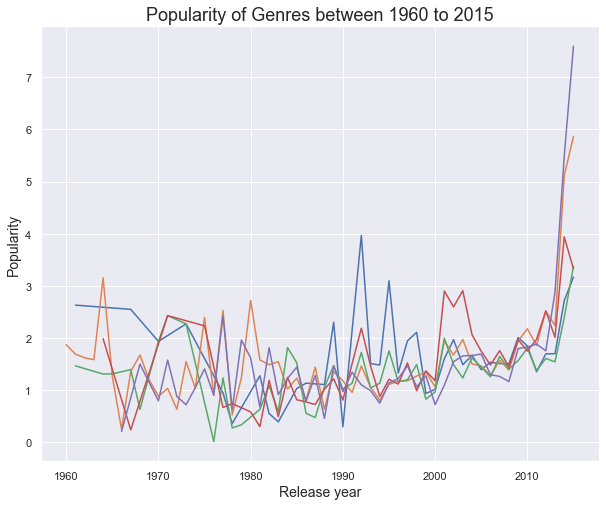

In [180]:
#top genres according to popularity from year to year
sns.set_style('darkgrid')

genre_pop = genres_peryear.groupby(['genres','release_year'], as_index=False)['popularity'].mean()
fig,ax = plt.subplots(figsize=(10,8))
for genres in ['Animation','Adventure','Family','Fantasy','Science Fiction']:
    ax.plot(genre_pop[genre_pop.genres==genres].release_year,
            genre_pop[genre_pop.genres==genres].popularity,label=genres)

#x-axis lable
ax.set_xlabel('Release year',size=14)
#y-axis lable
ax.set_ylabel('Popularity',size=14)
#Title of a the plot
plt.title('Popularity of Genres between 1960 to 2015',size=18)
plt.show()

As with the profitability review, we see a lot of year to year variation in the popularity of the five genres over time. Star Wars does not standout as clearly in the mid 70s, but Jurassic Park and Independence Day both make their mark in their release years. Science Fiction also takes the top spot for both profitability and popularity n 2015.

# Conclusion <a id="Ending"></a>

The purpose of the exercise was to see if we could:
1. measure the profitability of movies in the dataset 
1. find the most populare genres

We approached the first question by asking the following questions:
* Which year recorded the greatest profit?
* Which month does movie industry make the highest profit?
* Can ratings correlate to profits?

We were able to identify the year with the year with the highest profit, 2015. The graph also gave us insight into the profits between 1960 and 2015. We could identify the release of certain movies by the spike in profits. We could also see the effect of a bad economy on the movie industry, and watch the economy recover as people started to return to the movie theaters. 

We were able to use the data to determine with month(s) the movie industry makes the highest profit(s). What we found that the months of July and December are the two best months for profits. We also found that June and August were high performing months as well as November. With June, July, and August being the months when most students are out of school, and November and December being the holiday season. These time frames are also when a lot of people are traveling to visit family and have more time to take in a movie. 

Our last question related to profits was if we could correlate movie rating to profits. We found that if a movie was rated higher than a 5, then it had a better chance of being profitable. Profits grew as we moved into the higher ratings, with the highest profit outliers having a rating of 7 or 8. 

Our second set of questions focused on finding the most popular genres. We asked:
* Can we determine which genres are most popular?
* Can we determine the genres that are the most profitable?
* Can we determine the popularity of our five genres?

Determining the most popular genres was pretty straight forward, after we separated out the entries with a combined genre. Over the period covered in the dataset, Drama was the most popular genre. Drama would be dealt a setback in the next section where we started to review profitability and popularity. 

Our next question was to determine the most profitable geres. Even Though Drama was the most popular, it was not the most profitable. Animation took the crown for this question. Kids and families like to see movies. With classics such as Toy Story, Frozen, Shrek, Ice Age, and Up Animation will probably continue to return the highest profits for the movies studies. Maybe Live Action will take the crown in the future. 

The last question was an attempt to find the five most popular genres. The initial question was for that, we took the top five from the previous question and built a chart around them. While identifying the overall five most popular was fairly straight forward, the chart over time showed us that these five jockey for position every year. The most popular genre this year can easily be overtaken by another one next year. It is very much subject to the movies being released in a given year. 